In [19]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [20]:
data = pd.read_csv("data/target.csv")

In [21]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [22]:
data = data.dropna(how='any')

In [23]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int)

In [24]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [25]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [26]:
Y = data['res_type'].values.astype('int64')

In [27]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [28]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [29]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [30]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
model = Sequential()

In [33]:
model.add(Conv1D(filters=100,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(8,1), 
                 activation='relu'))

In [34]:
model.add(Conv1D(filters=50,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [35]:
model.add(MaxPooling1D(pool_size=1))

In [36]:
model.add(Dropout(0.25))

In [37]:
model.add(Flatten())

In [38]:
model.add(Dense(50, activation='tanh'))

In [39]:
model.add(Dropout(0.25))

In [40]:
model.add(Dense(5,activation='softmax'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 100)            400       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 6, 50)             5050      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 50)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 50)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 63043 samples, validate on 15761 samples
Epoch 1/60
63043/63043 [==============================] - 10s 162us/step - loss: 1.1679 - acc: 0.5616 - val_loss: 0.6715 - val_acc: 0.7607
Epoch 2/60
63043/63043 [==============================] - 8s 123us/step - loss: 0.4969 - acc: 0.8137 - val_loss: 0.2768 - val_acc: 0.9338
Epoch 3/60
63043/63043 [==============================] - 8s 130us/step - loss: 0.3045 - acc: 0.8865 - val_loss: 0.1794 - val_acc: 0.9596
Epoch 4/60
63043/63043 [==============================] - 5s 74us/step - loss: 0.2315 - acc: 0.9141 - val_loss: 0.1287 - val_acc: 0.9807
Epoch 5/60
63043/63043 [==============================] - 5s 74us/step - loss: 0.1889 - acc: 0.9292 - val_loss: 0.1071 - val_acc: 0.9796
Epoch 6/60
63043/63043 [==============================] - 4s 70us/step - loss: 0.1590 - acc: 0.9400 - val_loss: 0.0847 - val_acc: 0.9867
Epoch 7/60
63043/63043 [==============================] - 4s 61us/step - loss: 0.1392 - acc: 0.9471 - val_loss: 0.0729 - val

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

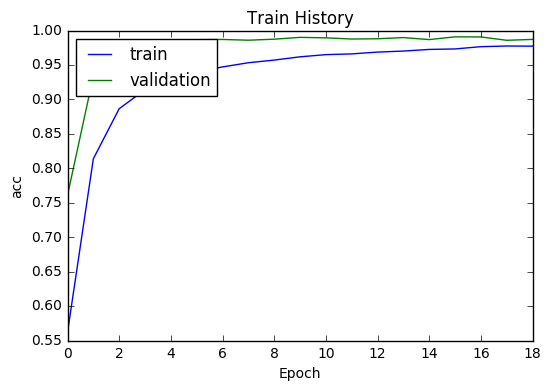

In [45]:
show_train_history(train_history,'acc','val_acc')

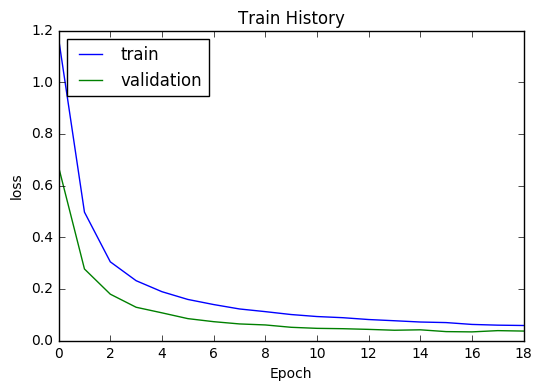

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 1s 53us/step


In [48]:
scores[1]

0.9865495889044791